In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040352.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.381232  0.375367  0.369501  0.363636  0.358749  0.353861  0.348974   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.345064  0.341153  0.338221  ...  0.354839  0.346041  0.338221  0.329423   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.320626  0.312805  0.304985  0.297165    115.844836      77.899401  

[1 rows x 4202 columns]
[115.84483603]  /  [77.89940075]
          0         1         2         3         4         5         6  \
0  0.381232  0.375367  0.369501  0.363636  0.358749  0.353861  0.348974   

          7         8         9  ...      4190      4191      4192      4193  \
0  0.345064  0.341153  0.338221  ...  0.369501  0.362659  0.354839  0.346041   

       4194      4195      4196      4197      4198      4199  
0  0.338221  0.329423  0.320626  0.312805  0.304985  0.297165  

[1 rows x 4200 columns]


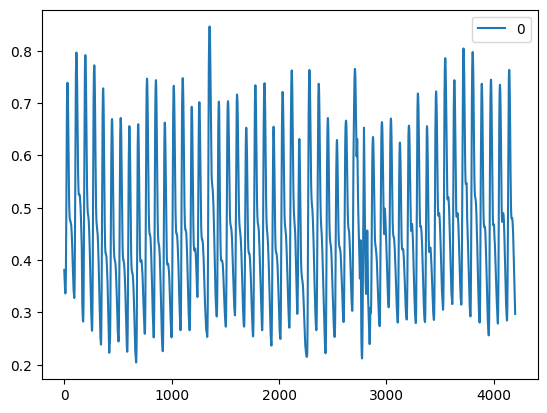

In [324]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [325]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

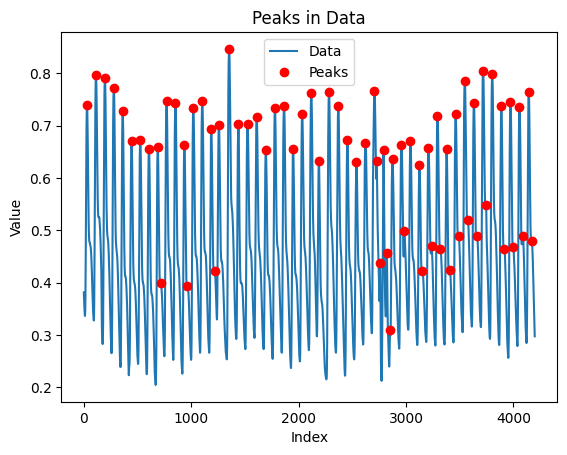

{'indices': array([  30,  113,  196,  279,  362,  445,  525,  606,  689,  717,  770,
        853,  936,  965, 1020, 1103, 1187, 1218, 1258, 1353, 1439, 1525,
       1609, 1695, 1780, 1864, 1949, 2033, 2118, 2189, 2283, 2370, 2455,
       2539, 2623, 2706, 2728, 2759, 2791, 2821, 2852, 2875, 2958, 2984,
       3042, 3125, 3152, 3209, 3238, 3293, 3320, 3378, 3408, 3463, 3490,
       3547, 3575, 3633, 3661, 3717, 3744, 3803, 3888, 3914, 3973, 4001,
       4057, 4087, 4143, 4169]), 'values': array([0.73900293, 0.79667644, 0.79178886, 0.77223851, 0.72825024,
       0.66959922, 0.67155425, 0.65591398, 0.65982405, 0.3998045 ,
       0.74682307, 0.74389052, 0.6627566 , 0.39296188, 0.73313783,
       0.74780059, 0.69305963, 0.42228739, 0.70185728, 0.84652981,
       0.7028348 , 0.70381232, 0.71652004, 0.65298143, 0.73411535,
       0.73802542, 0.65493646, 0.72140762, 0.76246334, 0.63147605,
       0.76344086, 0.7370479 , 0.67155425, 0.62952102, 0.66666667,
       0.76539589, 0.63147605, 0.43792

In [326]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [329]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[0.7390029325513197, 0.7966764418377321, 0.7917888563049853, 0.772238514173998, 0.7282502443792767, 0.6695992179863147, 0.6715542521994134, 0.6559139784946236, 0.6598240469208211, None, 0.7468230694037146, 0.7438905180840665, 0.6627565982404692, None, 0.7331378299120235, 0.7478005865102639, 0.6930596285434996, None, 0.7018572825024438, 0.8465298142717498, 0.7028347996089932, 0.7038123167155426, 0.7165200391006843, 0.6529814271749755, 0.7341153470185728, 0.7380254154447703, 0.6549364613880743, 0.7214076246334311, 0.7624633431085044, 0.6314760508308895, 0.7634408602150538, 0.7370478983382209, 0.6715542521994134, 0.6295210166177908, 0.6666666666666666, 0.7653958944281525, 0.6314760508308895, None, 0.6529814271749755, None, None, 0.635386119257087, 0.6637341153470185, None, 0.6705767350928641, 0.624633431085044, None, 0.656891495601173, None, 0.718475073313783, None, 0.6559139784946236, None, 0.7223851417399805, None, 0.7859237536656891, None, 0.7438905180840665, None, 0.804496578690127, N

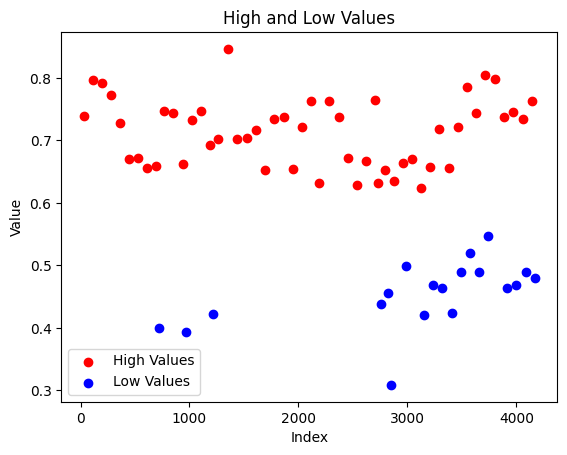

In [330]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [331]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7128974757058247
Average Low Value: 0.4550084889643463
